# <center>Human Activity Recognition</center>

<center><img src="https://media.giphy.com/media/l2JeaS9QDFFL2PMAw/giphy.gif" width=500></center>

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Getting the data

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
# So data has parameters based on which his/her activity is mentioned
# total 6 kinds of activity and we need predict activity if parameters given
# test is performed on 30 people and these are the data
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
train.isnull().sum().sum()

0

In [10]:
train["subject"].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

In [13]:
train["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# Data Processing

<center><img src="https://media.giphy.com/media/QxE3vw3DVntMQ/giphy.gif" width=400></center>

In [16]:
#checking for duplicates
train.duplicated().sum()

0

In [17]:
# check for null values
print(train.isnull().sum().sum(),test.isnull().sum().sum())

0 0


<Axes: xlabel='Activity', ylabel='count'>

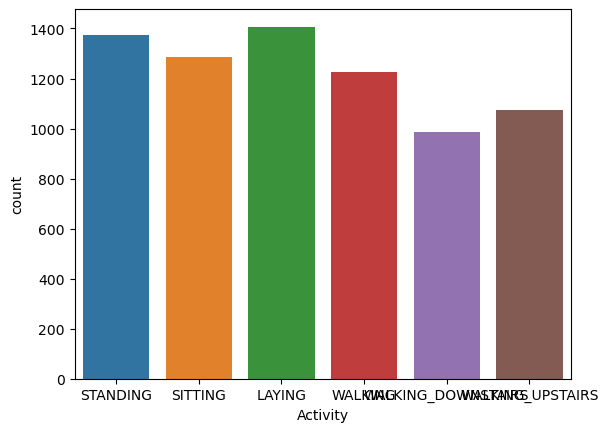

In [20]:
# checking data imbalance
sns.countplot(data=train,x="Activity")

# EDA

In [21]:
# to know about different parameters we use split 

In [28]:
parameters=[]
for i in train.columns:
    parameters.append(i.split("-")[0].split("(")[0])
parameters

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [31]:
pd.DataFrame(parameters)[0].value_counts()

0
fBodyAcc                79
fBodyGyro               79
fBodyAccJerk            79
tGravityAcc             40
tBodyAcc                40
tBodyGyroJerk           40
tBodyGyro               40
tBodyAccJerk            40
tBodyAccMag             13
tGravityAccMag          13
tBodyAccJerkMag         13
tBodyGyroMag            13
tBodyGyroJerkMag        13
fBodyAccMag             13
fBodyBodyAccJerkMag     13
fBodyBodyGyroMag        13
fBodyBodyGyroJerkMag    13
angle                    7
subject                  1
Activity                 1
Name: count, dtype: int64

In [32]:
parameters=set(parameters)
parameters

{'Activity',
 'angle',
 'fBodyAcc',
 'fBodyAccJerk',
 'fBodyAccMag',
 'fBodyBodyAccJerkMag',
 'fBodyBodyGyroJerkMag',
 'fBodyBodyGyroMag',
 'fBodyGyro',
 'subject',
 'tBodyAcc',
 'tBodyAccJerk',
 'tBodyAccJerkMag',
 'tBodyAccMag',
 'tBodyGyro',
 'tBodyGyroJerk',
 'tBodyGyroJerkMag',
 'tBodyGyroMag',
 'tGravityAcc',
 'tGravityAccMag'}

In [33]:
# relation of activity with with tBodyAccMag-mean()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\

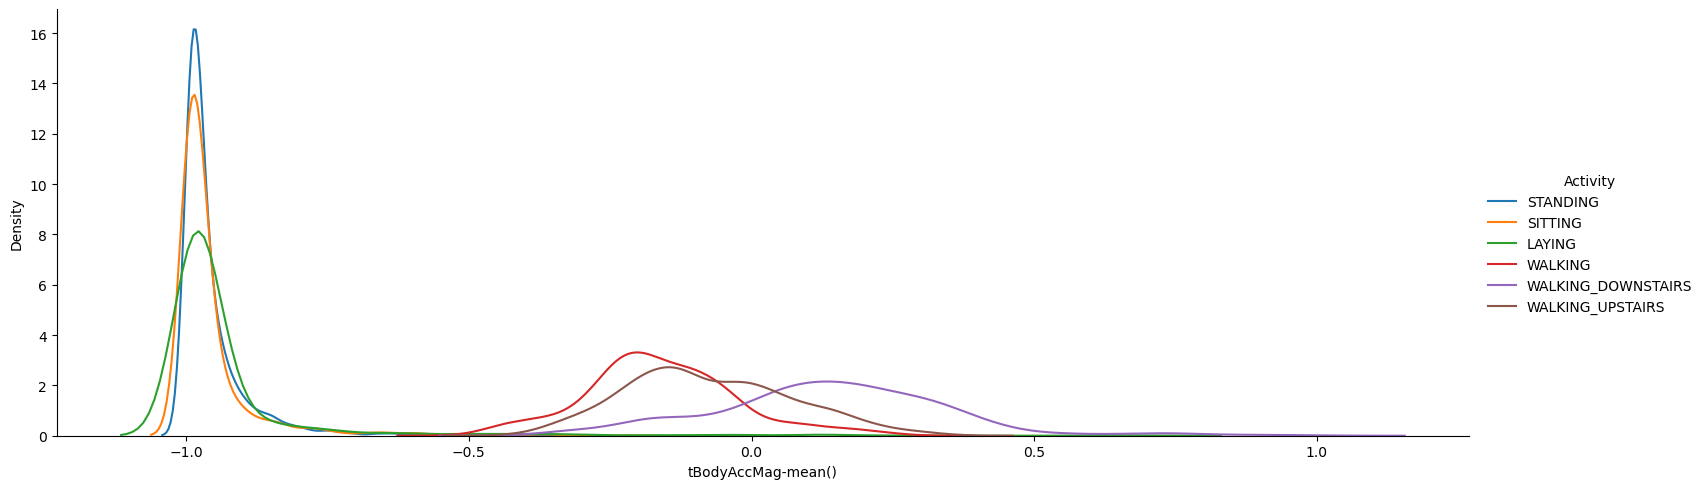

In [38]:
# Static and Dynamic activities
sns.FacetGrid(train,hue="Activity",height=5,aspect=3).map(sns.distplot,"tBodyAccMag-mean()",hist=False).add_legend()

<Axes: xlabel='Activity', ylabel='tBodyAccMag-mean()'>

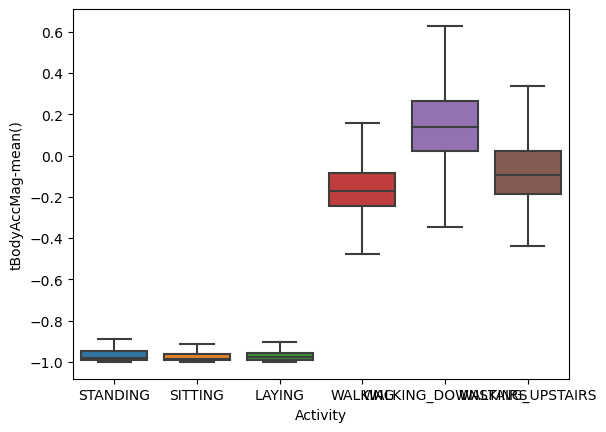

In [42]:
sns.boxplot(data=train,x="Activity",y="tBodyAccMag-mean()",showfliers=False)

<Axes: xlabel='Activity', ylabel='angle(X,gravityMean)'>

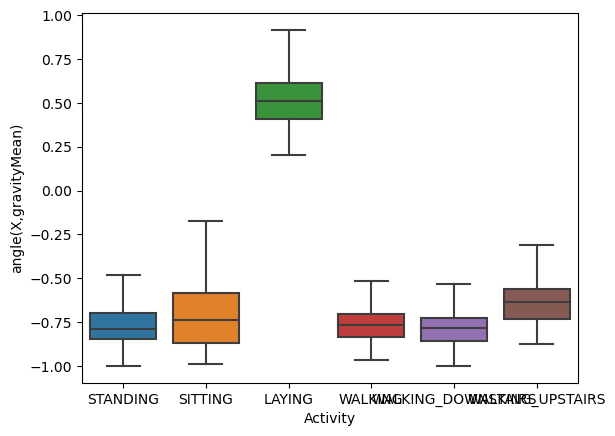

In [51]:
sns.boxplot(data=train,x="Activity",y="angle(X,gravityMean)",showfliers=False)

<Axes: xlabel='Activity', ylabel='angle(Y,gravityMean)'>

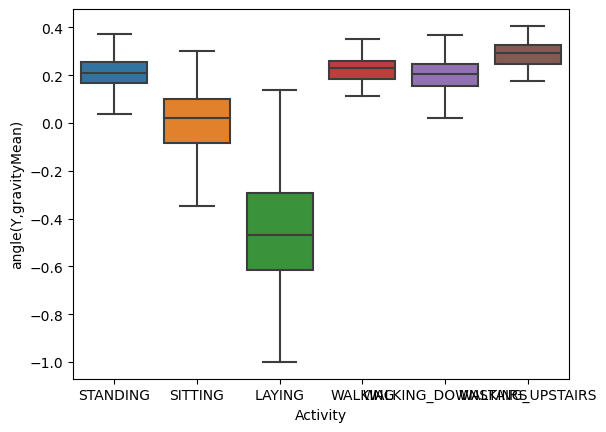

In [52]:
sns.boxplot(data=train,x="Activity",y="angle(Y,gravityMean)",showfliers=False)

In [53]:
# because in all other posture body is upright while laying not so

<center><img src="https://media.giphy.com/media/ajlQLhbrYQBPi/giphy.gif" width=500></center>

# Feature selection

In [54]:
x_pca=train.drop(["Activity","subject"],axis=1)
x_pca

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=0).fit_transform(x_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<Axes: >

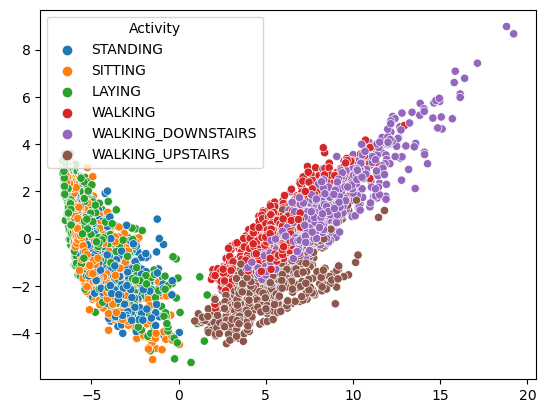

In [57]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train["Activity"])

In [58]:
# can see static and dynamic clealy cluster from PCA model so paramteres good

In [63]:
from sklearn.manifold import TSNE
tsne=TSNE(learning_rate=500,n_components=2,random_state=0).fit_transform(x_pca)

In [64]:
tsne

array([[ 12.808285 , -39.129646 ],
       [-23.84504  ,   1.8994378],
       [-21.01344  ,  -7.82472  ],
       ...,
       [ 10.771026 , -83.90178  ],
       [ 10.715068 , -83.642715 ],
       [ 11.141752 , -82.77284  ]], dtype=float32)

<Axes: >

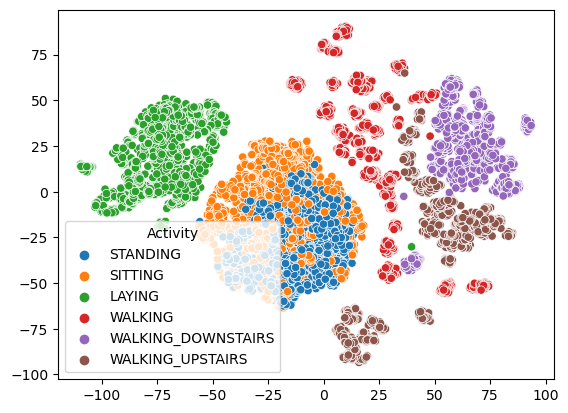

In [65]:
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train["Activity"])

In [66]:
# this clearly better than PCA

# Preparing Data for Training

In [68]:
x_train=train.drop(["Activity","subject"],axis=1)
y_train=train["Activity"]
x_test=test.drop(["Activity","subject"],axis=1)
y_test=test["Activity"]

# Training Using LR with Hyperparameter and Cross Validation

In [73]:
from sklearn.linear_model import LogisticRegression

In [76]:
from sklearn.model_selection import RandomizedSearchCV
para={"max_iter":[100,150,200]}
lr=LogisticRegression()
rscv=RandomizedSearchCV(lr,param_distributions=para,cv=5,random_state=0)
rscv.fit(x_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 150, 200]},
                   random_state=0)

# Testing Model

In [77]:
y_predict=rscv.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_predict,y_test)
score

0.954954954954955

In [82]:
print(rscv.best_params_)

{'max_iter': 200}


In [84]:
rscv.best_estimator_

LogisticRegression(max_iter=200)

<center><img src="https://media.giphy.com/media/Q1LPV0vs7oKqc/giphy.gif" width=400></center>